## Introduction to Deep Learning, HW 2
This document gives a suggested outline for the coding assignment.  Please see the assignment pdf for a more complete description of the assignment.

**[Duke Community Standard](http://integrity.duke.edu/standard.html): By typing your name below, you are certifying that you have adhered to the Duke Community Standard in completing this assignment.**

Name: Aaron Williams

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import trange         
% matplotlib inline

C:\Users\Zenaardvark\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Visualizing the data to make sure that its understood:

**Problem 2: 
Practical Implementations of Optimization Functions (27 Points)**

In addition to the mathematical intuition in problem 1, it is important to see what the practical implications of such functions are. There are numerous ways to implement such functions, but there are built-in Tensorflow functions that can do this for you.

Using the built in functions, i.e. (tf.train.GradientDescentOptimizer, tf.train.MomentumOptimizer, tf.train.AdamOptimizer), try out each function on your most complex MLP from HW 1. You can use any dataset you like, but MNIST is fine.

<br>
<br>
<i>For this first part I was just doing a little optimization of my previous multi-stage classifier.  I'm afraid I didn't get too much improvement out of the volume of work.</i>
<br>
<br>

In [ ]:

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
# hidden layer 1
W_1 = tf.Variable(tf.random_normal([784, 125]))
b_1 = tf.Variable(tf.random_normal([125]))
z_1 = tf.matmul(x, W_1) + b_1
# hidden layer 2
W_2 = tf.Variable(tf.random_normal([125, 100]))
b_2 = tf.Variable(tf.random_normal([100]))
z_2 = tf.matmul(tf.nn.sigmoid(z_1), W_2) + b_2
# Output
W_3 = tf.Variable(tf.random_normal([100, 10]))
b_3 = tf.Variable(tf.random_normal([10]))
y = tf.matmul(tf.nn.sigmoid(z_2), W_3) + b_3

# Softmax to probabilities
py = tf.nn.softmax(y)

# Define labels placeholder
y_ = tf.placeholder(tf.float32, [None, 10])

# Loss
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(py), reduction_indices=[1]))

# Optimizer
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# Create a Session object, initialize all variables
sess = tf.Session()
sess.run(tf.global_variables_initializer())

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [06:36<00:00, 252.21it/s]


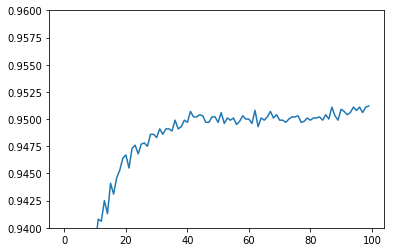

In [31]:
# Learning
val_acc = []

for i in trange(100000): 
    batch_xs, batch_ys = mnist.train.next_batch(100)
    _, curr_loss = sess.run([train_step,cross_entropy], feed_dict={x: batch_xs, y_: batch_ys})
    
    if i%1000 == 0:
        correct_prediction = tf.equal(tf.argmax(py, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        curr_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})

        val_acc.append(curr_acc)
    
plt.ylim((0.94,0.96))
plt.plot(val_acc)

In [32]:
# Evaluation

# Test trained model
correct_prediction = tf.equal(tf.argmax(py, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test accuracy: {0}'.format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))

# Close session to finish
sess.close()

Test accuracy: 0.9509999752044678


<br>
<br>
<i>Again, I was playing with the step sizes here and seeing if I could get some improvement.  Generally, my best results were  when my first layer sizes were smaller at ~100, and occasionally when my second layer sizes were greater then my first layer sizes.</i>
<br>
<br>

In [5]:
for l2_size in [300,250,200,175,150,125,100,80]:
    curr_mean = 0
    for _ in range(5):
        # Create the model
        x = tf.placeholder(tf.float32, [None, 784])
        # hidden layer 1
        W_1 = tf.Variable(tf.random_normal([784, 125]))
        b_1 = tf.Variable(tf.random_normal([125]))
        z_1 = tf.matmul(x, W_1) + b_1
        # hidden layer 2
        W_2 = tf.Variable(tf.random_normal([125, l2_size]))
        b_2 = tf.Variable(tf.random_normal([l2_size]))
        z_2 = tf.matmul(tf.nn.sigmoid(z_1), W_2) + b_2
        # Output
        W_3 = tf.Variable(tf.random_normal([l2_size, 10]))
        b_3 = tf.Variable(tf.random_normal([10]))
        y = tf.matmul(tf.nn.sigmoid(z_2), W_3) + b_3

        # Softmax to probabilities
        py = tf.nn.softmax(y)

        # Define labels placeholder
        y_ = tf.placeholder(tf.float32, [None, 10])
        cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(py), reduction_indices=[1]))
        train_step = tf.train.GradientDescentOptimizer(.5).minimize(cross_entropy)

        # Create a Session object, initialize all variables
        sess = tf.Session()
        sess.run(tf.global_variables_initializer())

        # Train the model
        for i in trange(25000): 
            batch_xs, batch_ys = mnist.train.next_batch(100)
            sess.run([train_step], feed_dict={x: batch_xs, y_: batch_ys}) 

        # Test trained model
        correct_prediction = tf.equal(tf.argmax(py, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        curr_acc = sess.run(accuracy, feed_d`ict={x: mnist.test.images, y_: mnist.test.labels})
        print("Current accuracy is = " + str(curr_acc))
        curr_mean += curr_acc/5
        
        # Close session to finish
        sess.close()
        
    print("Layer 2 size: " + str(l2_size) + " Accuracy: " + str(curr_mean))


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:59<00:00, 417.08it/s]


Current accuracy is = 0.9528


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:01<00:00, 404.82it/s]


Current accuracy is = 0.9486


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:07<00:00, 369.54it/s]


Current accuracy is = 0.9481


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:18<00:00, 319.35it/s]


Current accuracy is = 0.9463


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:01<00:00, 405.40it/s]


Current accuracy is = 0.951
Layer 2 size: 300 Accuracy: 0.9493599891662597


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:02<00:00, 398.97it/s]


Current accuracy is = 0.9492


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:56<00:00, 442.57it/s]


Current accuracy is = 0.9481


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:57<00:00, 435.68it/s]


Current accuracy is = 0.9482


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:58<00:00, 430.04it/s]


Current accuracy is = 0.9485


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:58<00:00, 427.74it/s]


Current accuracy is = 0.951
Layer 2 size: 250 Accuracy: 0.9489999771118164


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:50<00:00, 493.55it/s]


Current accuracy is = 0.9487


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:55<00:00, 450.37it/s]


Current accuracy is = 0.9473


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:01<00:00, 407.51it/s]


Current accuracy is = 0.9456


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:10<00:00, 353.38it/s]


Current accuracy is = 0.9509


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:11<00:00, 348.06it/s]


Current accuracy is = 0.951
Layer 2 size: 200 Accuracy: 0.9486999988555909


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:21<00:00, 305.82it/s]


Current accuracy is = 0.9442


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:58<00:00, 429.45it/s]


Current accuracy is = 0.9501


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:04<00:00, 386.37it/s]


Current accuracy is = 0.9483


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:07<00:00, 370.17it/s]


Current accuracy is = 0.9478


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:31<00:00, 273.29it/s]


Current accuracy is = 0.9497
Layer 2 size: 175 Accuracy: 0.9480199933052064


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:10<00:00, 354.03it/s]


Current accuracy is = 0.9481


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:34<00:00, 263.80it/s]


Current accuracy is = 0.9478


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:24<00:00, 294.31it/s]


Current accuracy is = 0.9475


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:03<00:00, 395.35it/s]


Current accuracy is = 0.9495


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:08<00:00, 364.50it/s]


Current accuracy is = 0.9482
Layer 2 size: 150 Accuracy: 0.9482199907302857


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:20<00:00, 310.98it/s]


Current accuracy is = 0.9461


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:03<00:00, 391.81it/s]


Current accuracy is = 0.9488


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:00<00:00, 414.68it/s]


Current accuracy is = 0.9497


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:54<00:00, 456.42it/s]


Current accuracy is = 0.946


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:27<00:00, 286.97it/s]


Current accuracy is = 0.9466
Layer 2 size: 125 Accuracy: 0.9474400043487549


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:02<00:00, 399.69it/s]


Current accuracy is = 0.9463


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:09<00:00, 362.02it/s]


Current accuracy is = 0.95


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:56<00:00, 445.87it/s]


Current accuracy is = 0.9509


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:05<00:00, 381.33it/s]


Current accuracy is = 0.9481


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:33<00:00, 268.17it/s]


Current accuracy is = 0.9502
Layer 2 size: 100 Accuracy: 0.9491000056266785


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:36<00:00, 258.79it/s]


Current accuracy is = 0.9481


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:26<00:00, 287.42it/s]


Current accuracy is = 0.9489


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:25<00:00, 292.85it/s]


Current accuracy is = 0.9493


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:26<00:00, 289.65it/s]


Current accuracy is = 0.945


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:26<00:00, 287.62it/s]


Current accuracy is = 0.9478
Layer 2 size: 80 Accuracy: 0.9478199839591981


<br>
<br>
<b>(a) Try multiple (>3) step-sizes for SGD. Determine the “optimal” constant step size.</b>
<br>
<i> For the following, I tried 8 SGD step sizes as shown.  I did 5 training sessions and averaged the validation accuracy over each for each SGD step size.</i>
<br>

In [34]:
for sgd_size in [0.99,0.9,0.75,0.6,0.5,0.4,0.1,0.01]:
    curr_mean = 0
    for _ in range(3):
        # Create the model
        x = tf.placeholder(tf.float32, [None, 784])
        # hidden layer 1
        W_1 = tf.Variable(tf.random_normal([784, 125]))
        b_1 = tf.Variable(tf.random_normal([125]))
        z_1 = tf.matmul(x, W_1) + b_1
        # hidden layer 2
        W_2 = tf.Variable(tf.random_normal([125, 100]))
        b_2 = tf.Variable(tf.random_normal([100]))
        z_2 = tf.matmul(tf.nn.sigmoid(z_1), W_2) + b_2
        # Output
        W_3 = tf.Variable(tf.random_normal([100, 10]))
        b_3 = tf.Variable(tf.random_normal([10]))
        y = tf.matmul(tf.nn.sigmoid(z_2), W_3) + b_3

        # Softmax to probabilities
        py = tf.nn.softmax(y)

        # Define labels placeholder
        y_ = tf.placeholder(tf.float32, [None, 10])
        cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(py), reduction_indices=[1]))
        train_step = tf.train.GradientDescentOptimizer(sgd_size).minimize(cross_entropy)

        # Create a Session object, initialize all variables
        sess = tf.Session()
        sess.run(tf.global_variables_initializer())

        # Train the model
        for i in trange(50000): 
            batch_xs, batch_ys = mnist.train.next_batch(100)
            sess.run([train_step], feed_dict={x: batch_xs, y_: batch_ys}) 

        # Test trained model
        correct_prediction = tf.equal(tf.argmax(py, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        curr_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
        curr_mean += curr_acc/3
        
        # Close session to finish
        sess.close()
        
    print("SGD step size: " + str(sgd_size) + " Validation Accuracy: " + str(curr_mean))

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [03:09<00:00, 264.02it/s]


Current accuracy is = 0.9528


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [03:09<00:00, 263.44it/s]


Current accuracy is = 0.9504


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [03:03<00:00, 272.42it/s]


Current accuracy is = 0.9517


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [03:05<00:00, 270.25it/s]


Current accuracy is = 0.9514


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [03:08<00:00, 265.09it/s]


Current accuracy is = 0.9486
SGD step size: 0.9 Validation Accuracy: 0.9509799838066102


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [03:12<00:00, 259.47it/s]


Current accuracy is = 0.95


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:09<00:00, 384.99it/s]


Current accuracy is = 0.952


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:53<00:00, 438.68it/s]


Current accuracy is = 0.9481


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:02<00:00, 406.81it/s]


Current accuracy is = 0.9493


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:05<00:00, 399.73it/s]


Current accuracy is = 0.9486
SGD step size: 0.6 Validation Accuracy: 0.9495999932289124


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:11<00:00, 381.40it/s]


Current accuracy is = 0.9489


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:14<00:00, 372.59it/s]


Current accuracy is = 0.9482


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:09<00:00, 344.38it/s]


Current accuracy is = 0.95


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:59<00:00, 418.06it/s]


Current accuracy is = 0.9513


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:08<00:00, 389.51it/s]


Current accuracy is = 0.9489
SGD step size: 0.5 Validation Accuracy: 0.9494599938392638


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:09<00:00, 386.29it/s]


Current accuracy is = 0.948


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:10<00:00, 384.35it/s]


Current accuracy is = 0.9488


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:09<00:00, 385.87it/s]


Current accuracy is = 0.9466


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:06<00:00, 394.31it/s]


Current accuracy is = 0.9474


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:11<00:00, 379.64it/s]


Current accuracy is = 0.9476
SGD step size: 0.4 Validation Accuracy: 0.9476800084114074


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:07<00:00, 391.04it/s]


Current accuracy is = 0.9468


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:13<00:00, 373.48it/s]


Current accuracy is = 0.9484


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:18<00:00, 362.09it/s]


Current accuracy is = 0.9469


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:16<00:00, 367.12it/s]


Current accuracy is = 0.9474


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:15<00:00, 368.58it/s]


Current accuracy is = 0.9516
SGD step size: 0.25 Validation Accuracy: 0.9482200026512146


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:14<00:00, 372.76it/s]


Current accuracy is = 0.9372


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:11<00:00, 379.58it/s]


Current accuracy is = 0.9348


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:12<00:00, 377.58it/s]


Current accuracy is = 0.9357


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:07<00:00, 391.36it/s]


Current accuracy is = 0.9391


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:07<00:00, 393.48it/s]


Current accuracy is = 0.9371
SGD step size: 0.1 Validation Accuracy: 0.9367800116539002


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:09<00:00, 386.72it/s]


Current accuracy is = 0.9284


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:14<00:00, 372.61it/s]


Current accuracy is = 0.9264


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:16<00:00, 366.49it/s]


Current accuracy is = 0.9246


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:16<00:00, 460.43it/s]


Current accuracy is = 0.9278


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:15<00:00, 370.28it/s]


Current accuracy is = 0.9293
SGD step size: 0.05 Validation Accuracy: 0.9273000001907349


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:15<00:00, 369.48it/s]


Current accuracy is = 0.8787


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:11<00:00, 378.82it/s]


Current accuracy is = 0.8796


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:13<00:00, 374.99it/s]


Current accuracy is = 0.883


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:11<00:00, 380.24it/s]


Current accuracy is = 0.8833


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:05<00:00, 398.48it/s]


Current accuracy is = 0.8828
SGD step size: 0.01 Validation Accuracy: 0.8814800024032592


<br>
<br>
<b>(a) Vary the step-size and momentum settings in SGD w/ momentum. Determine the “optimal” settings.</b>
<br>
<i> For the following, I tried 3 step sizes and 4 seperate momentums.  I did only 3 trials per run.</i>
<br>

In [4]:
for step_size in [0.99,0.9,0.5]:
    for momentum in [0.9,0.5,0.1,0.01]:
        curr_mean = 0
        for _ in range(3):
            # Create the model
            x = tf.placeholder(tf.float32, [None, 784])
            # hidden layer 1
            W_1 = tf.Variable(tf.random_normal([784, 125]))
            b_1 = tf.Variable(tf.random_normal([125]))
            z_1 = tf.matmul(x, W_1) + b_1
            # hidden layer 2
            W_2 = tf.Variable(tf.random_normal([125, 100]))
            b_2 = tf.Variable(tf.random_normal([100]))
            z_2 = tf.matmul(tf.nn.sigmoid(z_1), W_2) + b_2
            # Output
            W_3 = tf.Variable(tf.random_normal([100, 10]))
            b_3 = tf.Variable(tf.random_normal([10]))
            y = tf.matmul(tf.nn.sigmoid(z_2), W_3) + b_3

            # Softmax to probabilities
            py = tf.nn.softmax(y)

            # Define labels placeholder
            y_ = tf.placeholder(tf.float32, [None, 10])
            cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(py), reduction_indices=[1]))
            train_step = tf.train.MomentumOptimizer(step_size,momentum).minimize(cross_entropy)

            # Create a Session object, initialize all variables
            sess = tf.Session()
            sess.run(tf.global_variables_initializer())

            # Train the model
            for i in trange(50000): 
                batch_xs, batch_ys = mnist.train.next_batch(100)
                sess.run([train_step], feed_dict={x: batch_xs, y_: batch_ys}) 

            # Test trained model
            correct_prediction = tf.equal(tf.argmax(py, 1), tf.argmax(y_, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            curr_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            curr_mean += curr_acc/3

            # Close session to finish
            sess.close()
            
        print("Step size: " + str(step_size) + " Momentum: " + str(momentum) + " Validation Accuracy: " + str(curr_mean))


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:15<00:00, 370.21it/s]


Step size: 0.99 Momentum: 0.9 Validation Accuracy: 0.6772999987006187


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:19<00:00, 359.30it/s]


Step size: 0.99 Momentum: 0.5 Validation Accuracy: 0.9551666776339212


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:14<00:00, 373.01it/s]


Step size: 0.99 Momentum: 0.1 Validation Accuracy: 0.9541333317756653


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:19<00:00, 357.29it/s]


Step size: 0.99 Momentum: 0.01 Validation Accuracy: 0.9526333411534628


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:16<00:00, 367.32it/s]


Step size: 0.9 Momentum: 0.9 Validation Accuracy: 0.6787666703263919


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:09<00:00, 384.97it/s]


Step size: 0.9 Momentum: 0.5 Validation Accuracy: 0.9555666645367942


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:14<00:00, 370.77it/s]


Step size: 0.9 Momentum: 0.1 Validation Accuracy: 0.953233321507772


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:06<00:00, 394.90it/s]


Step size: 0.9 Momentum: 0.01 Validation Accuracy: 0.9509666562080383


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:15<00:00, 368.73it/s]


Step size: 0.5 Momentum: 0.9 Validation Accuracy: 0.9635999798774719


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:17<00:00, 362.77it/s]


Step size: 0.5 Momentum: 0.5 Validation Accuracy: 0.9532333215077717


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:28<00:00, 336.48it/s]


Step size: 0.5 Momentum: 0.1 Validation Accuracy: 0.9492666920026143


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:21<00:00, 354.44it/s]


Step size: 0.5 Momentum: 0.01 Validation Accuracy: 0.9490000009536743


<br>
<br>
<b>(c) Use the default settings of the Adam algorithm</b>
<br>
<i>We did this one over 8 iterations to get as close to an appropriate validation accuracy as possible</i>
<br>


In [6]:
curr_mean = 0
for _ in range(8):
    # Create the model
    x = tf.placeholder(tf.float32, [None, 784])
    # hidden layer 1
    W_1 = tf.Variable(tf.random_normal([784, 125]))
    b_1 = tf.Variable(tf.random_normal([125]))
    z_1 = tf.matmul(x, W_1) + b_1
    # hidden layer 2
    W_2 = tf.Variable(tf.random_normal([125, 100]))
    b_2 = tf.Variable(tf.random_normal([100]))
    z_2 = tf.matmul(tf.nn.sigmoid(z_1), W_2) + b_2
    # Output
    W_3 = tf.Variable(tf.random_normal([100, 10]))
    b_3 = tf.Variable(tf.random_normal([10]))
    y = tf.matmul(tf.nn.sigmoid(z_2), W_3) + b_3

    # Softmax to probabilities
    py = tf.nn.softmax(y)

    # Define labels placeholder
    y_ = tf.placeholder(tf.float32, [None, 10])
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(py), reduction_indices=[1]))
    train_step = tf.train.AdamOptimizer().minimize(cross_entropy)

    # Create a Session object, initialize all variables
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    # Train the model
    for i in trange(50000): 
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run([train_step], feed_dict={x: batch_xs, y_: batch_ys}) 

    # Test trained model
    correct_prediction = tf.equal(tf.argmax(py, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    curr_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    curr_mean += curr_acc/8

    # Close session to finish
    sess.close()

print("Adam Optimizer, default settings validation accuracy: " + str(curr_mean))

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:38<00:00, 315.00it/s]


Adam Optimizer, default settings validation accuracy: 0.9598749876022339


<br>
<br>
<b>(d) Vary the step-size of the Adam algorithm to see the change in how effective it works.</b>
<br>
<i>Again we vary step sizes for the Adam algorithm, a range that covers values both close to 1 and close to 0.  We average our validation accuracy over 3 attempts.</i>
<br>

In [8]:
for step_size in [0.99,0.9,0.75,0.6,0.5,0.4,0.1,0.01]:
    curr_mean = 0
    for _ in range(3):
        # Create the model
        x = tf.placeholder(tf.float32, [None, 784])
        # hidden layer 1
        W_1 = tf.Variable(tf.random_normal([784, 125]))
        b_1 = tf.Variable(tf.random_normal([125]))
        z_1 = tf.matmul(x, W_1) + b_1
        # hidden layer 2
        W_2 = tf.Variable(tf.random_normal([125, 100]))
        b_2 = tf.Variable(tf.random_normal([100]))
        z_2 = tf.matmul(tf.nn.sigmoid(z_1), W_2) + b_2
        # Output
        W_3 = tf.Variable(tf.random_normal([100, 10]))
        b_3 = tf.Variable(tf.random_normal([10]))
        y = tf.matmul(tf.nn.sigmoid(z_2), W_3) + b_3

        # Softmax to probabilities
        py = tf.nn.softmax(y)

        # Define labels placeholder
        y_ = tf.placeholder(tf.float32, [None, 10])
        cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(py), reduction_indices=[1]))
        train_step = tf.train.AdamOptimizer(step_size).minimize(cross_entropy)

        # Create a Session object, initialize all variables
        sess = tf.Session()
        sess.run(tf.global_variables_initializer())

        # Train the model
        for i in trange(50000): 
            batch_xs, batch_ys = mnist.train.next_batch(100)
            sess.run([train_step], feed_dict={x: batch_xs, y_: batch_ys}) 

        # Test trained model
        correct_prediction = tf.equal(tf.argmax(py, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        curr_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
        curr_mean += curr_acc/3

        # Close session to finish
        sess.close()

    print("Adam Optimizer with Step size: " + str(step_size) + " Validation Accuracy: " + str(curr_mean))

SyntaxError: invalid syntax (<ipython-input-8-083794a34806>, line 45)